# Criando os nomes

In [126]:
import pandas as pd

In [127]:
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')

In [128]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
185,SHEILA,0,85939,186,F
157,CONCEICAO,0,102585,158,F
123,IVONE,0,131256,124,F
193,LUCILENE,0,82838,194,F
197,LUCIANE,0,81230,198,F


In [129]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
10,LUIS,0,931530,11,M
137,AUGUSTO,0,104672,138,M
3,FRANCISCO,0,1765197,4,M
193,KAUAN,0,68526,194,M
126,MURILO,0,115067,127,M


In [130]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [131]:
frames = [nomes_f, nomes_m]

In [132]:
nomes = pd.concat(frames)['nome'].to_frame()

In [133]:
nomes.sample(5)

,nome
138,CLEBER
53,ELAINE
106,ARTUR
97,OSVALDO
8,PATRICIA


# Incluindo ID dos alunos

In [134]:
import numpy as np
np.random.seed(123)

In [135]:
total_alunos = len(nomes)
total_alunos

400

In [136]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [137]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [138]:
dominios = ['@dominiodoemmail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [139]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemmail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemmail.com.br
10,SANDRA,174,@dominiodoemmail.com.br
171,TERESINHA,45,@dominiodoemmail.com.br


In [140]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [141]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemmail.com.br,arthur@dominiodoemmail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemmail.com.br,helena@dominiodoemmail.com.br
183,IRACI,8,@dominiodoemmail.com.br,iraci@dominiodoemmail.com.br
189,DALVA,137,@dominiodoemmail.com.br,dalva@dominiodoemmail.com.br


# Criando a tabela Cursos

In [142]:
!pip3 install html5lib
!pip3 install lxml

In [143]:
import html5lib

In [144]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [145]:
type(cursos)

list

In [146]:
cursos = cursos[0]

In [147]:
type(cursos)

pandas.core.frame.DataFrame

In [148]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [149]:
cursos.rename(columns={'Nome do curso': 'nome_do_curso', 'Nome do curso': 'nome_do_curso'})

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [150]:
cursos['id'] = cursos.index + 1

In [151]:
cursos.head()

,Nome do curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [152]:
cursos = cursos.set_index('id')

In [153]:
cursos.head()

,Nome do curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [154]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominiodoemmail.com.br,isabel@dominiodoemmail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominiodoemmail.com.br,junior@dominiodoemmail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominiodoemmail.com.br,valdemir@dominiodoemmail.com.br


In [155]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [156]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
133,RUAN,130,@servicodoemail.com,ruan@servicodoemail.com,1
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,1
50,RAFAELA,27,@dominiodoemmail.com.br,rafaela@dominiodoemmail.com.br,1
45,ADRIANO,196,@servicodoemail.com,adriano@servicodoemail.com,2
117,PAMELA,189,@dominiodoemmail.com.br,pamela@dominiodoemmail.com.br,1


In [157]:
nomes.matriculas.describe()

count    400.000000
mean       2.147500
std        1.619352
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [158]:
import seaborn as sns

C:\Users\nagah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

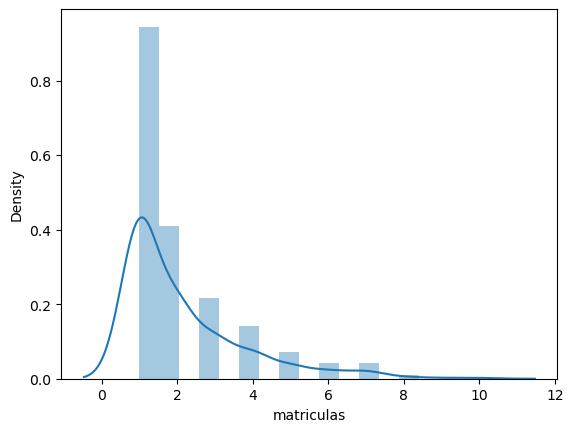

In [159]:
sns.distplot(nomes.matriculas)

In [160]:
nomes.matriculas.value_counts()

1     200
2      87
3      46
4      30
5      15
7       9
6       9
8       2
9       1
10      1
Name: matriculas, dtype: int64

# Selecionando cursos

In [161]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
97,BARBARA,201,@servicodoemail.com,barbara@servicodoemail.com,1
170,ALEXANDRO,341,@servicodoemail.com,alexandro@servicodoemail.com,1
197,MICHAEL,323,@dominiodoemmail.com.br,michael@dominiodoemmail.com.br,2
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
138,NEUSA,75,@dominiodoemmail.com.br,neusa@dominiodoemmail.com.br,2


In [162]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [163]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [164]:
matriculas.head()

,id_aluno,id_curso
0,235,6
1,235,16
2,43,6
3,43,11
4,43,12


In [165]:
matriculas.groupby('id_curso').count().join(cursos['Nome do curso']). rename(columns={'id_aluno':'quantidade_de_alunos', 'Nome do curso': 'nome_do_curso'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,75,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


In [166]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['Nome do curso']). rename(columns={'id_aluno':'quantidade_de_alunos', 'Nome do curso': 'nome_do_curso'})

In [167]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python


# Saída em diferentes formatos

In [168]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web


In [169]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [170]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,59,Lógica de programação
1,31,Java para Web
2,53,C# para Web
3,4,Ruby on Rails
4,12,Cursos de Python
5,75,PHP com MySql
6,32,.NET para web
7,18,Novas integrações com Java
8,59,TDD com Java
9,40,Código limpo com C#


In [171]:
matriculas_json = matriculas_por_curso.to_json()

In [172]:
matriculas_json

'{"quantidade_de_alunos":{"1":59,"2":31,"3":53,"4":4,"5":12,"6":75,"7":32,"8":18,"9":59,"10":40,"11":61,"12":66,"13":14,"14":27,"15":46,"16":43,"17":56,"18":53,"19":75,"20":35},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [173]:
matriculas_html = matriculas_por_curso.to_html()

In [174]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>59</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>31</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>53</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>12</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>75</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>32</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>18</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>59</td>
 

# Criando o banco sql

In [175]:
!pip install sqlalchemy

In [176]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

engine = create_engine('sqlite:///:memory:')

In [177]:
engine

Engine(sqlite:///:memory:)

In [178]:
type(engine)

sqlalchemy.engine.base.Engine

In [179]:
matriculas_por_curso.to_sql('matriculas', engine)

20

In [180]:
inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


# Buscando do banco sql

In [181]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [182]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,4,4,Ruby on Rails
1,5,12,Cursos de Python
2,8,18,Novas integrações com Java
3,13,14,Persistência com .NET


In [183]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,59
1,Java para Web,31
2,C# para Web,53
3,Ruby on Rails,4
4,Cursos de Python,12
5,PHP com MySql,75
6,.NET para web,32
7,Novas integrações com Java,18
8,TDD com Java,59
9,Código limpo com C#,40


In [184]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [185]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')

In [186]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos


# Escrevendo no banco

In [187]:
muitas_matriculas.to_sql('muitas_matriculas', con = engine)

0

In [188]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


C:\Users\nagah\AppData\Local\Temp\ipykernel_13240\1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


# Nomes dos alunos e alunas da próxima turma

In [189]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,75,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


In [190]:
matriculas

,id_aluno,id_curso
0,235,6
1,235,16
2,43,6
3,43,11
4,43,12
...,...,...
854,383,12
855,366,1
856,366,19
857,366,10


In [191]:
id_curso = 16
proxima_turma = matriculas.query(f'id_curso == {id_curso}')

In [192]:
proxima_turma

,id_aluno,id_curso
1,235,16
6,304,16
13,55,16
23,218,16
44,80,16
95,259,16
136,21,16
150,108,16
176,179,16
183,275,16


In [193]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
195,WALTER,231,@dominiodoemmail.com.br,walter@dominiodoemmail.com.br,2
90,ANDRESSA,213,@servicodoemail.com,andressa@servicodoemail.com,1
191,ERICK,124,@dominiodoemmail.com.br,erick@dominiodoemmail.com.br,1


In [194]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
5,16,SEVERINA,@dominiodoemmail.com.br,severina@dominiodoemmail.com.br,4
21,16,BIANCA,@servicodoemail.com,bianca@servicodoemail.com,4
36,16,KARINA,@dominiodoemmail.com.br,karina@dominiodoemmail.com.br,1
48,16,ALISON,@servicodoemail.com,alison@servicodoemail.com,1
55,16,MARCIA,@dominiodoemmail.com.br,marcia@dominiodoemmail.com.br,3
80,16,VITORIA,@servicodoemail.com,vitoria@servicodoemail.com,4
108,16,LUIZA,@servicodoemail.com,luiza@servicodoemail.com,7
110,16,OSVALDO,@servicodoemail.com,osvaldo@servicodoemail.com,3
110,16,OSVALDO,@servicodoemail.com,osvaldo@servicodoemail.com,3


In [195]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
5       SEVERINA
21        BIANCA
36        KARINA
48        ALISON
55        MARCIA
80       VITORIA
108        LUIZA
110      OSVALDO
110      OSVALDO
148        THAIS
149     MARILENE
153    CONCEICAO
162       RAFAEL
164        MARIO
170    REGINALDO
179         TAIS
196      ADRIANO
202        ESTER
208         LUIZ
214        JAIME
218       CAMILA
222      IVONETE
235        MARIA
251        MAURO
255       WESLEY
259     RAIMUNDA
266        CELSO
275         EDNA
279       WILIAN
304    FRANCISCA
320       ARTHUR
340         IAGO
346       LURDES
354     EDIVALDO
364      ROBERTO
369      POLIANA
377      VALERIA
385       MICHEL
389      LIDIANE
390       MARCOS
392       NELSON
398     CRISTIAN
399       CICERA
Name: nome, dtype: object

In [196]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
5,SEVERINA
21,BIANCA
36,KARINA
48,ALISON
55,MARCIA
80,VITORIA
108,LUIZA
110,OSVALDO
110,OSVALDO


In [204]:
nome_curso = cursos.loc[id_curso]
nome_curso

Nome do curso    Estatística básica
Name: 16, dtype: object

In [207]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

In [208]:
proxima_turma

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
5,16,SEVERINA,@dominiodoemmail.com.br,severina@dominiodoemmail.com.br,4
21,16,BIANCA,@servicodoemail.com,bianca@servicodoemail.com,4
36,16,KARINA,@dominiodoemmail.com.br,karina@dominiodoemmail.com.br,1
48,16,ALISON,@servicodoemail.com,alison@servicodoemail.com,1
55,16,MARCIA,@dominiodoemmail.com.br,marcia@dominiodoemmail.com.br,3
80,16,VITORIA,@servicodoemail.com,vitoria@servicodoemail.com,4
108,16,LUIZA,@servicodoemail.com,luiza@servicodoemail.com,7
110,16,OSVALDO,@servicodoemail.com,osvaldo@servicodoemail.com,3
110,16,OSVALDO,@servicodoemail.com,osvaldo@servicodoemail.com,3


In [210]:
proxima_turma.rename(columns = {'nome' : 'Alunos do curso de Estatística Básica'})

,id_curso,Alunos do curso de Estatística Básica,dominio,email,matriculas
id_aluno,,,,,
5,16,SEVERINA,@dominiodoemmail.com.br,severina@dominiodoemmail.com.br,4
21,16,BIANCA,@servicodoemail.com,bianca@servicodoemail.com,4
36,16,KARINA,@dominiodoemmail.com.br,karina@dominiodoemmail.com.br,1
48,16,ALISON,@servicodoemail.com,alison@servicodoemail.com,1
55,16,MARCIA,@dominiodoemmail.com.br,marcia@dominiodoemmail.com.br,3
80,16,VITORIA,@servicodoemail.com,vitoria@servicodoemail.com,4
108,16,LUIZA,@servicodoemail.com,luiza@servicodoemail.com,7
110,16,OSVALDO,@servicodoemail.com,osvaldo@servicodoemail.com,3
110,16,OSVALDO,@servicodoemail.com,osvaldo@servicodoemail.com,3


In [211]:
proxima_turma.sample(5)

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
218,16,CAMILA,@dominiodoemmail.com.br,camila@dominiodoemmail.com.br,1
279,16,WILIAN,@servicodoemail.com,wilian@servicodoemail.com,2
108,16,LUIZA,@servicodoemail.com,luiza@servicodoemail.com,7
398,16,CRISTIAN,@servicodoemail.com,cristian@servicodoemail.com,3
340,16,IAGO,@dominiodoemmail.com.br,iago@dominiodoemmail.com.br,2


# Excel

In [212]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [213]:
pd.read_excel('proxima_turma.xlsx')

,id_curso,nome,dominio,email,matriculas
0,16,SEVERINA,@dominiodoemmail.com.br,severina@dominiodoemmail.com.br,4
1,16,BIANCA,@servicodoemail.com,bianca@servicodoemail.com,4
2,16,KARINA,@dominiodoemmail.com.br,karina@dominiodoemmail.com.br,1
3,16,ALISON,@servicodoemail.com,alison@servicodoemail.com,1
4,16,MARCIA,@dominiodoemmail.com.br,marcia@dominiodoemmail.com.br,3
5,16,VITORIA,@servicodoemail.com,vitoria@servicodoemail.com,4
6,16,LUIZA,@servicodoemail.com,luiza@servicodoemail.com,7
7,16,OSVALDO,@servicodoemail.com,osvaldo@servicodoemail.com,3
8,16,OSVALDO,@servicodoemail.com,osvaldo@servicodoemail.com,3
9,16,THAIS,@servicodoemail.com,thais@servicodoemail.com,6
